# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.3.0


# Task 2: Rotation

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40
)

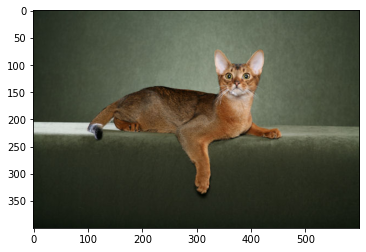

In [ ]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


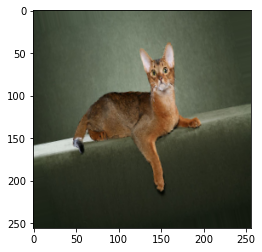

In [ ]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100, -50, 0, 50, 100],
    height_shift_range=[-50, 0, 50]
)

Found 1 images belonging to 1 classes.


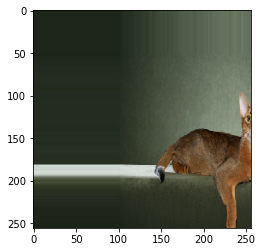

In [ ]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


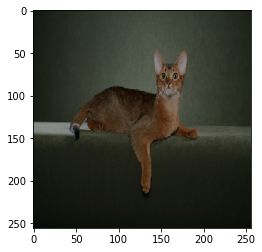

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


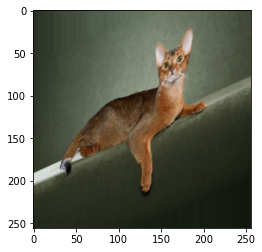

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


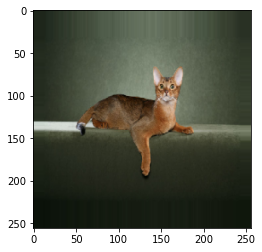

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=[0.5, 1.5]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


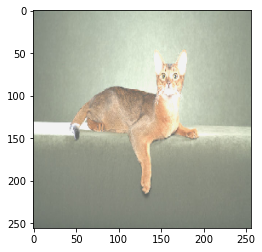

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
x.mean()

165.86766

In [ ]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


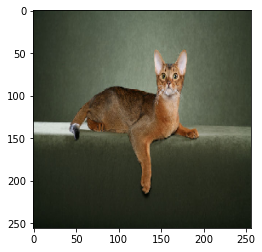

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True
)

In [4]:
generator.fit(x_train)

In [5]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.6431825 0.92839134 [[6]]
120.70756512369792


### Samplewise

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-4.4703484e-08 1.0 [[2]]


# Task 10: Rescale and Preprocessing Function

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale = 1/255.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [14]:
print(x.mean(), x.std(), y)

0.00016441004 0.001034426 [[5]]


# Task 11: Using in Model Training

In [15]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale = 1/255.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [19]:
# Your code here
model = tf.keras.models.Sequential([
                                    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(32,32,3), pooling='avg'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
_ = model.fit(generator.flow(x_train,y_train,batch_size=32), epochs=1, steps_per_epoch=10)

10/10 [==============================] - 2s 232ms/step - loss: 3.2326 - accuracy: 0.0594
